# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


6c59ab4d71e4a1eb3a9e77b1f4869a84


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# DF to store all cities and city number (uses citipy)
citydf = pd.DataFrame({'City': cities})

# Sets parameters for calling city name


# Target Url for API calls
target_url = "http://api.openweathermap.org/data/2.5/weather"

# Create add'l fields for later api calls
citydf['Date'] = ''
citydf['Latitude'] = ''
citydf['Longitude'] = ''
citydf['Max Temp (F)'] = ''
citydf['Humidity (%)'] = ''
citydf['Cloudiness (%)'] = ''
citydf['Wind Speed'] = ''

city_count = 0

# Loop through the API
for index,row in citydf.iterrows():

    city_name = row['City']
    
    # Set query parameters
    params = {'q': city_name,'units': 'imperial','appid': weather_api_key,}
    response = requests.get(target_url, params = params).json()
    
    try:
        citydf.loc[index, 'Date'] = response['dt']
        citydf.loc[index, 'Latitude'] = response['coord']['lat']
        citydf.loc[index, 'Longitude'] = response['coord']['lon']
        citydf.loc[index, 'Max Temp (F)'] = response['main']['temp_max']
        citydf.loc[index, 'Humidity (%)'] = response['main']['humidity']
        citydf.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        citydf.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        # Update city number
        city_count += 1
        
        # Print log of each city being processed (only if all data is available)
        print(f'Processing entry. City #: {city_count}, City Name: {city_name}')
        
    except (KeyError, IndexError):

        print("Data missing, excluding result...")


Data missing, excluding result...
Processing entry. City #: 1, City Name: butaritari
Processing entry. City #: 2, City Name: cape town
Processing entry. City #: 3, City Name: baft
Processing entry. City #: 4, City Name: cidreira
Processing entry. City #: 5, City Name: albany
Processing entry. City #: 6, City Name: khatanga
Processing entry. City #: 7, City Name: saint-philippe
Processing entry. City #: 8, City Name: busselton
Processing entry. City #: 9, City Name: punta arenas
Processing entry. City #: 10, City Name: vaini
Processing entry. City #: 11, City Name: kaputa
Processing entry. City #: 12, City Name: lexington park
Processing entry. City #: 13, City Name: marovoay
Processing entry. City #: 14, City Name: ancud
Processing entry. City #: 15, City Name: tautira
Processing entry. City #: 16, City Name: norman wells
Processing entry. City #: 17, City Name: castro
Processing entry. City #: 18, City Name: kapaa
Processing entry. City #: 19, City Name: praia
Processing entry. City #

Processing entry. City #: 155, City Name: longyearbyen
Processing entry. City #: 156, City Name: ahipara
Processing entry. City #: 157, City Name: zhigansk
Processing entry. City #: 158, City Name: saldanha
Processing entry. City #: 159, City Name: xichang
Processing entry. City #: 160, City Name: kidal
Processing entry. City #: 161, City Name: torbay
Processing entry. City #: 162, City Name: teya
Processing entry. City #: 163, City Name: kavaratti
Processing entry. City #: 164, City Name: mahebourg
Data missing, excluding result...
Processing entry. City #: 165, City Name: betare oya
Processing entry. City #: 166, City Name: nanortalik
Processing entry. City #: 167, City Name: lebu
Processing entry. City #: 168, City Name: yeniseysk
Processing entry. City #: 169, City Name: suraabad
Processing entry. City #: 170, City Name: wattegama
Processing entry. City #: 171, City Name: jinhua
Processing entry. City #: 172, City Name: boundiali
Processing entry. City #: 173, City Name: kavieng
Pr

Processing entry. City #: 310, City Name: mount gambier
Data missing, excluding result...
Processing entry. City #: 311, City Name: misratah
Processing entry. City #: 312, City Name: moose factory
Processing entry. City #: 313, City Name: nova olimpia
Processing entry. City #: 314, City Name: ilulissat
Processing entry. City #: 315, City Name: kurilsk
Processing entry. City #: 316, City Name: sorong
Processing entry. City #: 317, City Name: brenes
Processing entry. City #: 318, City Name: pompeia
Processing entry. City #: 319, City Name: kilemary
Processing entry. City #: 320, City Name: camacupa
Processing entry. City #: 321, City Name: hudiksvall
Processing entry. City #: 322, City Name: cabatuan
Processing entry. City #: 323, City Name: nayoro
Data missing, excluding result...
Processing entry. City #: 324, City Name: cerqueira cesar
Processing entry. City #: 325, City Name: dehui
Processing entry. City #: 326, City Name: ust-nera
Processing entry. City #: 327, City Name: berlevag
P

Processing entry. City #: 465, City Name: tura
Processing entry. City #: 466, City Name: gazojak
Processing entry. City #: 467, City Name: belaya gora
Data missing, excluding result...
Processing entry. City #: 468, City Name: pombal
Processing entry. City #: 469, City Name: luwuk
Data missing, excluding result...
Processing entry. City #: 470, City Name: vilyuysk
Processing entry. City #: 471, City Name: takaka
Processing entry. City #: 472, City Name: filadelfia
Data missing, excluding result...
Processing entry. City #: 473, City Name: hobyo
Processing entry. City #: 474, City Name: taoudenni
Processing entry. City #: 475, City Name: sao joao da barra
Processing entry. City #: 476, City Name: plettenberg bay
Processing entry. City #: 477, City Name: talnakh
Processing entry. City #: 478, City Name: kupang
Processing entry. City #: 479, City Name: madang
Processing entry. City #: 480, City Name: grand gaube
Processing entry. City #: 481, City Name: issia
Processing entry. City #: 482

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Drops all n/a fields, prints total entries, and prints the df with all data from api
citydf.replace('',np.nan,inplace=True)
citydf = citydf.dropna()
total_cities = citydf.count()
print(total_cities)
citydf.head(50)

City              588
Date              588
Latitude          588
Longitude         588
Max Temp (F)      588
Humidity (%)      588
Cloudiness (%)    588
Wind Speed        588
dtype: int64


,City,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed
1,butaritari,1.595487e+09,3.07,172.79,83.62,76.0,0.0,15.35
2,cape town,1.595487e+09,-33.93,18.42,55.00,100.0,90.0,5.82
3,baft,1.595487e+09,29.23,56.61,82.44,20.0,0.0,5.44
4,cidreira,1.595487e+09,-30.18,-50.21,63.27,79.0,100.0,12.17
5,albany,1.595487e+09,42.60,-73.97,73.00,92.0,100.0,1.83
6,khatanga,1.595487e+09,71.97,102.50,46.13,78.0,100.0,19.26
7,saint-philippe,1.595487e+09,-21.36,55.77,66.20,88.0,75.0,23.04
8,busselton,1.595487e+09,-33.65,115.33,62.01,37.0,27.0,15.28
9,punta arenas,1.595487e+09,-53.15,-70.92,32.00,91.0,96.0,11.41
10,vaini,1.595487e+09,-21.20,-175.20,69.80,94.0,75.0,11.41


In [18]:
# Stores all data found to a csv
citydf.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
citydf['Humidity (%)'].max()

100.0

In [20]:
#  Get the indices of cities that have humidity over 100%.


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [22]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (04/01/20)')

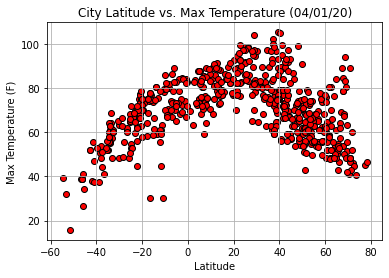

In [23]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (04/01/20)')

#### Latitude vs Temperature Analysis
* By plotting the max temps across all latitudes, we can now get a visual representation the possible max temp trends against latitudes. 
* From a first glance there appears to be a strong correlation.

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (04/01/20)')

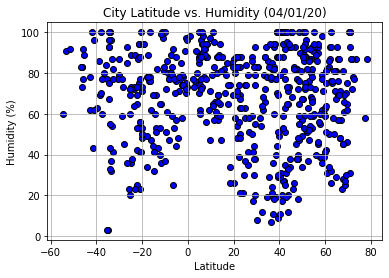

In [25]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Humidity (%)'], c = 'b', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (04/01/20)')

#### Latitude vs Humidity Analysis
* By plotting the humidity across all latitudes, we can now get a visual representation the possible humidity trends against latitudes. 
* From a first glance there appears to be a slight decline in humidity in the northern hemisphere. 

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (04/01/20)')

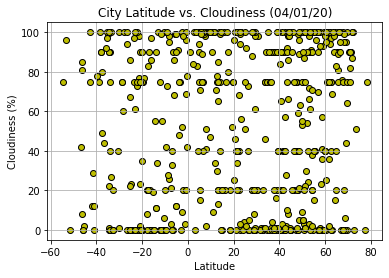

In [26]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Cloudiness (%)'], c = 'y', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (04/01/20)')

#### Latitude vs Cloudiness Analysis
* By plotting the cloudiness across all latitudes, we can now get a visual representation the possible cloudiness trends against latitudes. 
* From a first glance there appears to be little to no coorelation. 

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (04/01/20)')

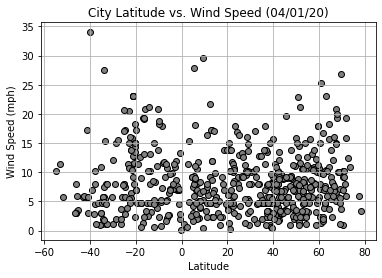

In [52]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Wind Speed'], c = 'grey', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (04/01/20)')

#### Latitdue vs Wind Speed Analysis
* By plotting the wind speed across all latitudes, we can now get a visual representation the possible wind speed trends against latitudes. 
* From a first glance there appears to be little to no coorelation. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.34


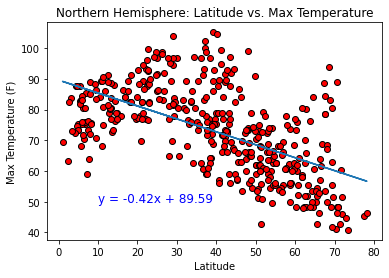

In [76]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Max Temp (F)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(10,50),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.56


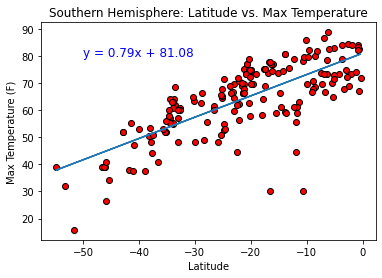

In [77]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Max Temp (F)'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-50,80),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01


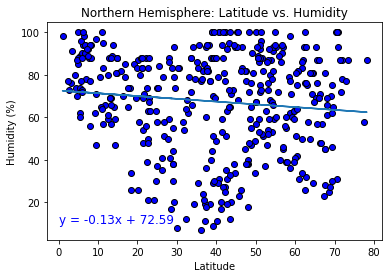

In [81]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Humidity (%)'], c = 'b', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere: Latitude vs. Humidity')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Humidity (%)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(0,10),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.56


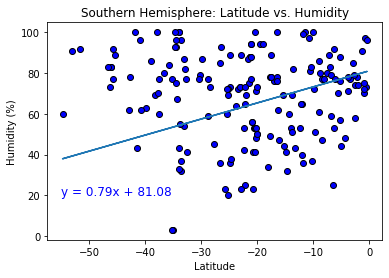

In [93]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Humidity (%)'], c = 'b', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere: Latitude vs. Humidity')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Max Temp (F)'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-55,20),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0


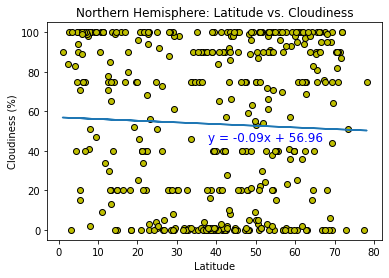

In [86]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Cloudiness (%)'], c = 'y', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere: Latitude vs. Cloudiness')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Cloudiness (%)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(38,45),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0


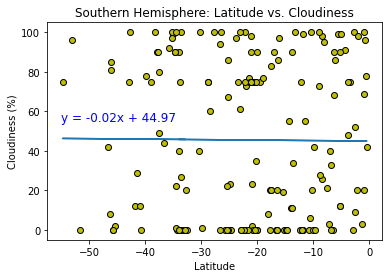

In [88]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Cloudiness (%)'], c = 'y', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere: Latitude vs. Cloudiness')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Cloudiness (%)'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-55,55),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


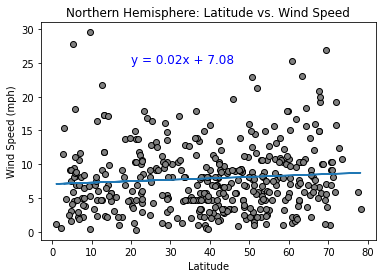

In [91]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Wind Speed'], c = 'grey', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere: Latitude vs. Wind Speed')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Wind Speed'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(20,25),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


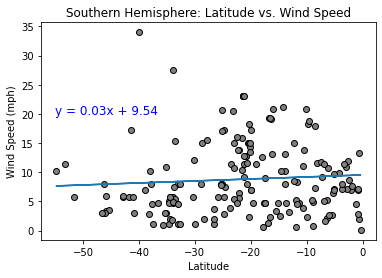

In [92]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Wind Speed'], c = 'grey', edgecolor = 'k',)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere: Latitude vs. Wind Speed')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Wind Speed'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-55,20),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

## What's the weather as it gets hotter?
* The northern hemisphere has a moderate negative correlation: as latitude increases, temp decreases but we do not see as strong of a trend compared to the southern hemisphere. (r_sq = .34, slope = -.42)
* The southern hemisphere has a strong positive correlation: as latitude increases, temp increases. (r_sq = .56, slope = .79)
* The only other notable trend can be found in the lat vs hum for the southern hemisphere. This also experiences a positive correlation: as latitude increases, humidity increases. (r_sq = .56, slope = .79) 
* An additional observation I made is that the lat vs temp has similar r_sq & slope values as the lat vs hum analysis. However, in the lat vs hum visual you can see that the variability is much higher than the lat vs temp. This shows the limitation of analyzing data without both the visual and regression analysis. In order to better tell the story, we should take extra steps to find out the differences in data sets. Using variability as another metric would help communicate this. 
